# Evaluation Metrics - Lab

## Introduction

In this lab, we'll calculate various evaluation metrics to compare to evaluate classifier performance!

## Objectives

You will be able to:

* Read and interpret results using a Confusion Matrix
* Calculate and interpret precision and recall and evaluation metrics for classification
* Calculate and interpret accuracy and f1-score as evaluation metrics for classification

## Getting Started

For this lab, you're going to read in a DataFrame containing various predictions from different models, as well as the ground-truth labels for the dataset that each model was making predictions on. You'll also write various functions to help you easily calculate important evaluation metrics such as **_Precision_**, **_Recall_**, **_Accuracy_**, and **_F1-Score_**.

Let's start by reading in our dataset. You'll find the dataset stored in `'model_performance.csv'`. In the cell below, use pandas to read this dataset into a DataFrame, and inspect the head.

In [4]:
import pandas as pd

data=pd.read_csv('model_performance.csv')

data.head()

,Model 1 Predictions,Model 2 Predictions,Model 3 Predictions,Labels
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,0,1,1,0
4,0,0,1,1


The dataset consists of model predictions from 3 different models, as well as the corresponding labels for row in the dataset. 

In the cell below, store each of the following predictions and labels in separate variables.

In [5]:
model1_preds = data['Model 1 Predictions']
model2_preds = data['Model 2 Predictions']
model3_preds = data['Model 3 Predictions']
labels = data['Labels']

Good! Now, let's get started by building a confusion matrix!

## Confusion Matrix

In the cell below, complete the `conf_matrix` function.  This function should:

* Take in 2 arguments: 
    * `y_true`, an array of labels
    * `y_pred`, an array of model predictions
* Return a Confusion Matrix in the form of a dictionary, where the keys are `'TP', 'TN', 'FP', 'FN'`. 

In [6]:
def conf_matrix(y_true, y_pred):
    cf={'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for index, value in enumerate(y_pred):
        if y_true[index]:
            if y_true[index]==value:
                cf['TP']+=1
            else:
                cf['FN']+=1
        else:
            if y_true[index]==value:
                cf['TN']+=1
            else:
                cf['FP']+=1
    return cf

Great! Now, let's double check that our function was created correctly by creating confusion matrices for each of our 3 models. Expected outputs have been provided for you to check your results against.

In [7]:
# Model 1 Expected Output: {'TP': 6168, 'TN': 2654, 'FP': 346, 'FN': 832}
model1_confusion_matrix = conf_matrix(labels, model1_preds)
model1_confusion_matrix

{'TP': 6168, 'TN': 2654, 'FP': 346, 'FN': 832}

In [8]:
# Model 2 Expected Output: {'TP': 3914, 'TN': 1659, 'FP': 1341, 'FN': 3086}
model2_confusion_matrix = conf_matrix(labels, model2_preds)
model2_confusion_matrix

{'TP': 3914, 'TN': 1659, 'FP': 1341, 'FN': 3086}

In [9]:
# Model 3 Expected Output: {'TP': 5505, 'TN': 2319, 'FP': 681, 'FN': 1495}
model3_confusion_matrix = conf_matrix(labels, model3_preds)
model3_confusion_matrix

{'TP': 5505, 'TN': 2319, 'FP': 681, 'FN': 1495}

## Checking Our Work with sklearn

To check our work, let's make use the the `confusion_matrix()` function found in `sklearn.metrics` to create some confusion matrices and make sure that sklearn's results match up with our own.

In the cells below, import the `confusion_matrix()` function, use it to create a confusion matrix for each of our models, and then compare the results with the confusion matrices we created above. 

In [11]:
# from sklearn.metrics import confusion_matrix

model1_sk_cm = confusion_matrix(labels, model1_preds)
model1_sk_cm

array([[2654,  346],
       [ 832, 6168]])

In [13]:
model2_sk_cm = confusion_matrix(labels, model2_preds)
model2_sk_cm

array([[1659, 1341],
       [3086, 3914]])

In [15]:
model3_sk_cm = confusion_matrix(labels, model3_preds)
model3_sk_cm

array([[2319,  681],
       [1495, 5505]])

## (Optional) Visualizing Confusion Matrices

In the cells below, use the visualization function shown in the **_Confusion Matrices_** lesson to visualize each of the confusion matrices created above. 

In [17]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()


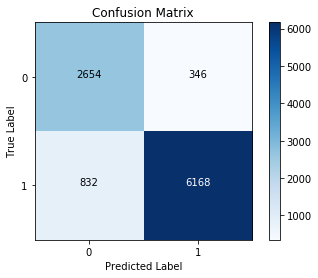

In [18]:
show_cf(labels, model1_preds)

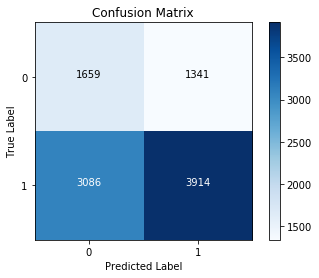

In [19]:
show_cf(labels, model2_preds)

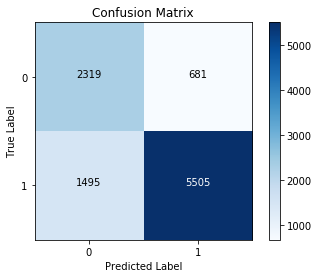

In [20]:
show_cf(labels, model3_preds)

## Calculating Evaluation Metrics

Now, we'll use our newly created confusion matrices to calculate some evaluation metrics. 

As a reminder, here are the equations for each evaluation metric we'll be calculating in this lab:

### Precision

$$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$$

### Recall

$$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$$

### Accuracy

$$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$$

### F1-Score

$$F1-Score = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$$

In each of the cells below, complete the function to calculate the appropriate evaluation metrics. Use the output to fill in the following table: 

|  Model  | Precision | Recall | Accuracy | F1-Score |
|:-------:|:---------:|:------:|:--------:|:--------:|
| Model 1 |     0.94688363524716      |    0.8811428571428571    |     0.8822     |     0.9128311380790292     |
| Model 2 |     0.744814462416746      |    0.5591428571428572    |     0.5573     |    0.6387596899224806      |
| Model 3 |    0.8899127061105723      |   0.7864285714285715     |    0.7824      |     0.8349764902168968     |

**_QUESTION:_** Which model performed the best? How do arrive at your answer?

In [21]:
def precision(confusion_matrix):
    return (confusion_matrix['TP'])/(confusion_matrix['TP']+confusion_matrix['FP'])
print(precision(model1_confusion_matrix)) # Expected Output: 0.94688363524716
print(precision(model2_confusion_matrix)) # Expected Output: 0.744814462416746
print(precision(model3_confusion_matrix)) # Expected Output: 0.8899127061105723

0.94688363524716
0.744814462416746
0.8899127061105723


In [22]:
def recall(confusion_matrix):
    return (confusion_matrix['TP'])/(confusion_matrix['TP']+confusion_matrix['FN'])

print(recall(model1_confusion_matrix)) # Expected Output: 0.8811428571428571
print(recall(model2_confusion_matrix)) # Expected Output: 0.5591428571428572
print(recall(model3_confusion_matrix)) # Expected Output: 0.7864285714285715

0.8811428571428571
0.5591428571428572
0.7864285714285715


In [ ]:
def accuracy(confusion_matrix):
    return (confusion_matrix['TP']+confusion_matrix['TN'])/(confusion_matrix['TP']+confusion_matrix['FN'])

print(accuracy(model1_confusion_matrix)) # Expected Output: 0.8822
print(accuracy(model2_confusion_matrix)) # Expected Output: 0.5573
print(accuracy(model3_confusion_matrix)) # Expected Output: 0.7824

In [ ]:
def f1(confusion_matrix):
    pass

print(f1(model1_confusion_matrix)) # Expected Output: 0.9128311380790292
print(f1(model2_confusion_matrix)) # Expected Output: 0.6387596899224806
print(f1(model3_confusion_matrix)) # Expected Output: 0.8349764902168968

Great Job! Let's check our work with sklearn. 

## Calculating Metrics with sklearn

Each of the metrics we calculated above are also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Then, use the `labels` and the predictions from each model (not the confusion matrices) to double check the performance of our functions above. 

In [ ]:
# Import everything needed here first!


preds = [model1_preds, model2_preds, model3_preds]

for ind, i in enumerate(preds):
    print('-'*40)
    print('Model {} Metrics:'.format(ind + 1))
    print('Precision: {}'.format(None))
    print('Recall: {}'.format(None))
    print('Accuracy: {}'.format(None))
    print('F1-Score: {}'.format(None))

## Classification Reports

Remember that table that you filled out above? It's called a **_Classification Report_**, and it turns out that sklearn can even create one of those for you! This classification report even breaks down performance by individual class predictions for your model. 

In closing, let's create some and interpret some classification reports using sklearn. Like everything else we've used this lab, you can find the `classification_report()` function inside the `sklearn.metrics` module.  This function takes in two required arguments: labels, and predictions. 

Complete the code in the cell below to create classification reports for each of our models. 

In [ ]:
# Import classification_report below!

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model {} Classification Report:".format(ind + 1))
    print(None)

## Summary

In this lab, we manually calculated various evaluation metrics to help us evaluate classifier performance, and we also made use of preexisting tools inside of sklearn for the same purpose. 